# Generating word lists for StressMem 

Goal: 100 negative and 100 positive words balanced on everything (arousal, frequency, etc) but valence.

In [8]:
%cd ~/Work/Expts/Code/
import misc
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import ttest_ind
from numpy import random
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/danieldillon/Work/Expts/Code


In [3]:
uname = !whoami
uname = uname[0]
path2words = '/Users/' + uname + '/Work/Expts/StressMem/'
%cd {path2words}

### Handling the Imageability data

In [133]:
df_img = pd.read_csv(path2words + 'mturk_img_ratings.csv', header = 0)
df_img = df_img[df_img.imagability_complete == 2]
df_img = df_img.transpose()
df_img.reset_index(level=0, inplace=True)
df_img_just_words = df_img[3:348] # we just care about the words for now
df_img_just_words = df_img_just_words.apply(lambda x: pd.to_numeric(x, errors='ignore')) #Need to make all rows numeric
df_img_just_words['Imageability'] = df_img_just_words.sum(axis=1)
df_img_just_words['Imageability'] = df_img_just_words['Imageability'].div(50)
df_img_just_words = df_img_just_words.rename(columns={'index': 'Word'})
df_img_just_words.tail()

,Word,0,1,2,3,5,7,8,9,11,...,51,52,53,54,55,57,58,59,60,Imageability
343,upbeat,1.0,5.0,3.0,2.0,4.0,4.0,5.0,7.0,4.0,...,5.0,5.0,5.0,2.0,4.0,3.0,6.0,2.0,6.0,3.84
344,recognition,3.0,5.0,2.0,3.0,4.0,3.0,1.0,7.0,3.0,...,5.0,7.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,3.36
345,vermin,7.0,7.0,6.0,6.0,3.0,7.0,7.0,7.0,1.0,...,6.0,7.0,4.0,4.0,3.0,5.0,5.0,5.0,7.0,4.78
346,waste,7.0,6.0,6.0,5.0,5.0,7.0,7.0,7.0,5.0,...,6.0,7.0,5.0,3.0,4.0,5.0,2.0,4.0,5.0,4.42
347,miserable,2.0,6.0,5.0,4.0,4.0,4.0,6.0,7.0,5.0,...,5.0,7.0,4.0,2.0,2.0,5.0,6.0,2.0,2.0,3.66


### Generating an initial list (can skip if you have balanced_words.csv)

In [3]:
df = pd.read_csv(path2words + 'WordsListF.csv')
del df['Unnamed: 0']
del df['ValenceStand']
df.head()

,Word,MeanValence,MeanArousal,val,letters,frequency,Concreteness,Img,pos,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,abandonment,2.63,4.95,0,11,49,2.54,3.48,noun,NaN,NaN,NaN
1,ache,3.27,4.30,0,4,127,3.43,443.00,noun,NaN,NaN,NaN
2,alone,3.85,4.00,0,5,15735,2.86,480.00,noun,NaN,NaN,NaN
3,angst,3.50,5.76,0,5,47,1.96,NaN,adj,NaN,NaN,NaN
4,annoyance,2.95,4.10,0,9,25,2.14,NaN,noun,NaN,NaN,NaN


In [7]:
df = df.merge(df_img_just_words, how = 'outer')
df = df[['Word', 'MeanValence', 'MeanArousal', 'val', 'letters', 'frequency', 'Concreteness', 'pos', 'Imageability']]
df = df.drop_duplicates('Word') # we had a few repeats
df = df[pd.notnull(df['Imageability'])]# we didn't include "focus" in the MTurk study, so img is blank
df = df[pd.notnull(df['val'])]
df = df[df.Word != 'bummer']
df = df[df.Word != 'clingy']
df = df[df.Word != 'comatose']
df = df[df.Word != 'deadbeat']
df = df[df.Word != 'faker']
df = df[df.Word != 'hag']
df = df[df.Word != 'lowlife']
df = df[df.Word != 'mousy']
df = df[df.Word != 'scumbag']
df = df[df.Word != 'sleaze']
df = df[df.Word != 'wannabe']
df = df[df.Word != 'kisser']
df = df[df.Word != 'longevity']
df = df[df.Word != 'pizzazz']
df = df[df.Word != 'upbeat']
df = df[df.Word != 'angst']
df = df[df.Word != 'nutcase']
df = df[df.Word != 'newlywed'] # the LSA thing doesn't know these words...there's prob an easier way to do this...
df.to_csv('WordsF.csv')

In [4]:
#gets two new random lists
def getnewneglist():
    sampled_dfneg = dfneg.sample(100)
    return sampled_dfneg

# creating a random sample of 100 positive words
def getnewposlist():
    sampled_dfpos = dfpos.sample(100)
    return sampled_dfpos


In [5]:
# checks the ttest for the new lists given a column name
def checknewsig(column_name):
    return ttest_ind(b[column_name], a[column_name])

In [6]:
# makes a df with the p's and t's of the words
def makepdf():
    pchart = pd.DataFrame({'p':[checknewsig('letters').pvalue, 
                                   checknewsig('mean_arousal').pvalue, 
                                  checknewsig('frequency').pvalue, 
                                   checknewsig('concreteness').pvalue,
                                   checknewsig('imageability').pvalue,
                           ],
                          't':[checknewsig('letters').statistic, 
                                   checknewsig('mean_arousal').statistic, 
                                  checknewsig('frequency').statistic, 
                                   checknewsig('concreteness').statistic,
                                  checknewsig('imageability').statistic, 
                          ]},
                       index=['letters', 'mean_arousal', 'frequency','concreteness', 'imageability'])
    return pchart
    

In [7]:
# checks the given series to see if columns are > .05
def checkpdf(x):
    return x.loc['frequency', 'p'] > .05 and x.loc['MeanArousal','p'] > .05 and x.loc['letters','p'] > .05 and x.loc['Imageability','p'] > .001 and x.loc['Concreteness','p'] > .05
    

In [8]:
# not using this anymore but keep for reference
def main():
    a = getnewneglist()
    b = getnewposlist()
    if checkpdf(makepdf()) == True:
        makepdf().to_csv('p_values.csv')
        a.append(b).to_csv('balanced_words.csv')
    else:
        return main()

In [1223]:
main()

### Checking balanced_words.csv

In [200]:
ab = pd.read_csv(path2words + '/PsychoPy/balanced_words.csv')
a = ab[ab.valence == 0]
b = ab[ab.valence == 1]
print ('Negative Words:')
print (a.mean()) 
print ('--------------------')
print ('Positive Words:')
print (b.mean())

Negative Words:
mean_valence      2.7665
mean_arousal      4.7315
valence           0.0000
letters           7.3000
frequency       863.6300
concreteness      2.5987
imageability      3.5094
dtype: float64
--------------------
Positive Words:
mean_valence       7.2131
mean_arousal       4.6198
valence            1.0000
letters            7.4500
frequency       1311.9700
concreteness       2.4290
imageability       3.6588
dtype: float64


In [201]:
ab.groupby(['valence','part_of_speech']).word.count()

valence  part_of_speech
0        adj               39
         noun              61
1        adj               48
         noun              52
Name: word, dtype: int64

In [202]:
makepdf()

,p,t
letters,0.639432,0.469215
mean_arousal,0.373559,-0.891844
frequency,0.231280,1.200758
concreteness,0.096863,-1.668166
imageability,0.114059,1.587216


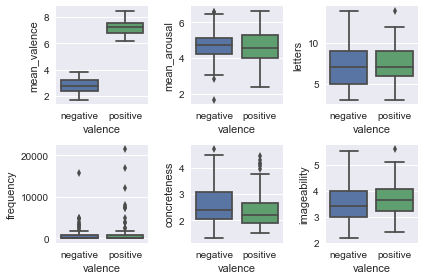

In [203]:
# from Dan's notebook
ab['valence'] = ab['valence'].replace(to_replace=[0,1],value=['negative','positive'])
f = plt.figure()
ct = 1
ab.imageability = pd.to_numeric(ab.imageability)
for val in ['mean_valence','mean_arousal','letters','frequency','concreteness','imageability']:
    cumval = 230 + ct
    ax = f.add_subplot(cumval)
    sns.boxplot(y=val,x='valence',data=ab)
    ct = ct + 1
f.tight_layout()

In [204]:
#any duplicates?
print (ab.word.count())
ab.drop_duplicates('word')
print (ab.word.count())

200
200


In [205]:
for i, row_i in ab.iterrows():
    stem = row_i.word[:3]
    matches = list(filter(lambda x: row_i.word[:3] in x[:3], ab.word))
    print (i, matches)

0 ['turnoff']
1 ['pest']
2 ['loser']
3 ['captive', 'capable']
4 ['worthless']
5 ['cynic']
6 ['traitor', 'traveler']
7 ['distress', 'disappointment', 'disaster', 'disgrace', 'disgusting']
8 ['jerk']
9 ['selfish']
10 ['bastard']
11 ['distress', 'disappointment', 'disaster', 'disgrace', 'disgusting']
12 ['insulting', 'insecure']
13 ['unwanted', 'unwelcome']
14 ['gloom']
15 ['filth']
16 ['dull']
17 ['lazy']
18 ['failure']
19 ['untrustworthy']
20 ['victim']
21 ['unsuccessful']
22 ['terrible', 'terrified']
23 ['pain']
24 ['alone']
25 ['inadequate']
26 ['regret']
27 ['bitterness']
28 ['mess']
29 ['irritating', 'irresponsible']
30 ['garbage']
31 ['annoying']
32 ['irritating', 'irresponsible']
33 ['stinky']
34 ['unwanted', 'unwelcome']
35 ['phony']
36 ['degenerate']
37 ['heartbroken', 'headache', 'healthy']
38 ['reject']
39 ['hesitation']
40 ['sad']
41 ['insulting', 'insecure']
42 ['awkward']
43 ['hypocrite']
44 ['shame']
45 ['anxiety']
46 ['distress', 'disappointment', 'disaster', 'disgrace', 

### Looking at LSA

http://lsa.colorado.edu/  
To get the csvs, c&p the negative and positive words seperately into the matrix comparison, then c&p the results into excel. 

In [196]:
# add the negative LSA csv
lsa = pd.read_csv(path2words + 'option8_lsa_neg_WORKING.csv')
neg = lsa
values = lsa[lsa['Document']].values
lower_triangular = values[np.tril_indices(values.shape[0], -1)]
lsa = pd.DataFrame({'Neg': lower_triangular})

In [197]:
# add the positive LSA csv
pos = pd.read_csv(path2words + 'option8_lsa_pos_WORKING.csv')
values = pos[pos['Document']].values
lower_triangular = values[np.tril_indices(values.shape[0], -1)]
lsa['Pos'] = lower_triangular
lsa.count()

Neg    4950
Pos    4950
dtype: int64

In [198]:
# some descriptives
lsa.describe()

,Neg,Pos
count,4950.000000,4950.000000
mean,0.120535,0.123428
std,0.104867,0.103781
min,-0.100000,-0.120000
25%,0.040000,0.050000
50%,0.100000,0.100000
75%,0.180000,0.180000
max,0.690000,0.760000


In [199]:
ttest_ind(lsa['Neg'], lsa['Pos']) # are they different?

Ttest_indResult(statistic=-1.3795455654782742, pvalue=0.16775777230188826)

## Dan check 

In [5]:
%cd {path2words}
df = pd.read_csv(path2words + '/PsychoPy/StressMem/balanced_words.csv')
df.head()

/Users/danieldillon/Work/Expts/StressMem


,word,mean_valence,mean_arousal,valence,letters,frequency,concreteness,part_of_speech,imageability
0,turnoff,2.85,4.26,0,7,36,2.36,noun,2.72
1,pest,2.67,5.14,0,4,146,3.96,noun,4.50
2,loser,2.85,3.94,0,5,1381,2.35,noun,3.56
3,captive,3.27,4.88,0,7,116,3.03,noun,3.82
4,worthless,1.89,4.45,0,9,473,1.97,adj,2.62


In [6]:
len(df)

200

In [7]:
df.valence.value_counts()

1    100
0    100
Name: valence, dtype: int64

In [10]:
# Looks good . . . 
for variable in ['mean_valence','mean_arousal','letters','frequency','concreteness','imageability']:
    print variable
    misc.ttest_2s(df[df.valence == 0][variable],df[df.valence == 1][variable])
    print '. . .'

mean_valence
t(198) = -61.33, p = 0.000
. . .
mean_arousal
t(198) = 0.89, p = 0.374
. . .
letters
t(198) = -0.47, p = 0.639
. . .
frequency
t(198) = -1.20, p = 0.231
. . .
concreteness
t(198) = 1.67, p = 0.097
. . .
imageability
t(198) = -1.59, p = 0.114
. . .


In [14]:
# This looks good, not too much overlap . . . 

words = df.word
for i, row_i in df.iterrows():
    stem = row_i.word[:3]
    for word in words:
        if stem == word[:3] and word != row_i.word:
            print row_i.word, word

captive capable
traitor traveler
distress disappointment
distress disaster
distress disgrace
distress disgusting
disappointment distress
disappointment disaster
disappointment disgrace
disappointment disgusting
insulting insecure
unwanted unwelcome
terrible terrified
irritating irresponsible
irresponsible irritating
unwelcome unwanted
heartbroken headache
heartbroken healthy
insecure insulting
disaster distress
disaster disappointment
disaster disgrace
disaster disgusting
disgrace distress
disgrace disappointment
disgrace disaster
disgrace disgusting
sloppy slob
creep creative
unforgivable unfaithful
slob sloppy
uninvited unity
uninvited unique
menace mentor
peril perfect
terrified terrible
disgusting distress
disgusting disappointment
disgusting disaster
disgusting disgrace
parasite partner
unfaithful unforgivable
headache heartbroken
headache healthy
entertainer enthusiastic
mentor menace
unity uninvited
unity unique
merit mercy
proficiency progress
proficiency productive
special spe